## Box Plots and Line Charts (Scores, LOC, D3, Survey)

>> Run correlation on overall improvement scores (Spearman Correlation)

>> Run the correlations per subgroup - to see if the picture changes there.

>> Examining the distribution of each metrics using histogram and normality test 




In [1]:
# retrive variables stored in other Jupyter notebooks

%store -r overall_loc_scores_final
%store -r overall_loc_scores

In [2]:
survey = overall_loc_scores_final[['Q2_Q2_1', 'Q2_Q2_2', 'Q2_Q2_3', 
                                   'Q2_Q2_4', 'Q2_Q2_5', 'Q2_Q2_6', 
                                   'Q2_Q2_7', 'Q2_Q2_8', 'Q2_Q2_9', 
                                   'Q2_Q2_10', 'Q2_Q2_11', 'Q2_Q2_12', 
                                   'Q2_Q2_13', 'Q3_Q3_1', 'Q3_Q3_2', 'Q3_Q3_3', 'Q3_Q3_4', 'Q3_Q3_5','Q4_Q4_1', 'Q4_Q4_2', 'Q4_Q4_3', 'Q4_Q4_4', 'Q4_Q4_5', 'Q5_Q5_1', 'Q5_Q5_2', 'Q5_Q5_3', 'Q5_Q5_4', 'Q5_Q5_5', 'Q7_Q7_1',
                                   'Q7_Q7_2', 'Q7_Q7_3', 'Q7_Q7_4', 'Q8_Q8_1', 'Q8_Q8_2','Q10','improve-tech-15','improve-ur-15','improve-vis-15', 'improve-novel-15', 'improve-total-15', 'improve-tech-45','improve-ur-45','improve-vis-45', 'improve-novel-45', 'improve-total-45'
                                ]]


survey.head(5)





,Q2_Q2_1,Q2_Q2_2,Q2_Q2_3,Q2_Q2_4,Q2_Q2_5,Q2_Q2_6,Q2_Q2_7,Q2_Q2_8,Q2_Q2_9,Q2_Q2_10,...,improve-tech-15,improve-ur-15,improve-vis-15,improve-novel-15,improve-total-15,improve-tech-45,improve-ur-45,improve-vis-45,improve-novel-45,improve-total-45
0,6.0,4.0,5.0,1.0,2.0,5.0,6.0,4.0,5.0,3.0,...,50.0,0.0,0.00,50.00,100.00,0.0,0.0,0.00,6.25,6.25
1,1.0,3.0,5.0,2.0,2.0,3.0,5.0,4.0,1.0,2.0,...,0.0,60.0,75.00,67.50,202.50,0.0,40.0,37.50,-32.50,45.00
2,4.0,6.0,4.0,3.0,5.0,6.0,5.0,5.0,6.0,6.0,...,25.0,100.0,54.17,25.00,204.17,12.5,0.0,-4.16,25.00,33.34
3,4.0,5.0,6.0,4.0,5.0,6.0,6.0,4.0,4.0,6.0,...,62.5,20.0,37.50,16.67,136.67,25.0,0.0,-8.33,-8.33,8.34
4,3.0,5.0,4.0,4.0,2.0,5.0,4.0,0.0,2.0,5.0,...,50.0,60.0,58.33,87.50,255.83,12.5,20.0,4.16,87.50,124.16


In [3]:
bogota_0_survey = overall_loc_scores_final[overall_loc_scores_final['Group'].isin([0])]
survey0 = bogota_0_survey[['Q2_Q2_1', 'Q2_Q2_2', 'Q2_Q2_3', 
                                   'Q2_Q2_4', 'Q2_Q2_5', 'Q2_Q2_6', 
                                   'Q2_Q2_7', 'Q2_Q2_8', 'Q2_Q2_9', 
                                   'Q2_Q2_10', 'Q2_Q2_11', 'Q2_Q2_12', 
                                   'Q2_Q2_13', 'Q3_Q3_1', 'Q3_Q3_2', 'Q3_Q3_3', 'Q3_Q3_4', 'Q3_Q3_5','Q4_Q4_1', 'Q4_Q4_2', 'Q4_Q4_3', 'Q4_Q4_4', 'Q4_Q4_5', 'Q5_Q5_1', 'Q5_Q5_2', 'Q5_Q5_3', 'Q5_Q5_4', 'Q5_Q5_5', 'Q7_Q7_1',
                                   'Q7_Q7_2', 'Q7_Q7_3', 'Q7_Q7_4', 'Q8_Q8_1', 'Q8_Q8_2','Q10','improve-tech-15','improve-ur-15','improve-vis-15', 'improve-novel-15', 'improve-total-15', 'improve-tech-45','improve-ur-45','improve-vis-45', 'improve-novel-45', 'improve-total-45'
                                ]]




In [4]:
bogota_1_survey = overall_loc_scores_final[overall_loc_scores_final['Group'].isin([1])]
survey1 = bogota_1_survey[['Q2_Q2_1', 'Q2_Q2_2', 'Q2_Q2_3', 
                                   'Q2_Q2_4', 'Q2_Q2_5', 'Q2_Q2_6', 
                                   'Q2_Q2_7', 'Q2_Q2_8', 'Q2_Q2_9', 
                                   'Q2_Q2_10', 'Q2_Q2_11', 'Q2_Q2_12', 
                                   'Q2_Q2_13', 'Q3_Q3_1', 'Q3_Q3_2', 'Q3_Q3_3', 'Q3_Q3_4', 'Q3_Q3_5','Q4_Q4_1', 'Q4_Q4_2', 'Q4_Q4_3', 'Q4_Q4_4', 'Q4_Q4_5', 'Q5_Q5_1', 'Q5_Q5_2', 'Q5_Q5_3', 'Q5_Q5_4', 'Q5_Q5_5', 'Q7_Q7_1',
                                   'Q7_Q7_2', 'Q7_Q7_3', 'Q7_Q7_4', 'Q8_Q8_1', 'Q8_Q8_2','Q10','improve-tech-15','improve-ur-15','improve-vis-15', 'improve-novel-15', 'improve-total-15', 'improve-tech-45','improve-ur-45','improve-vis-45', 'improve-novel-45', 'improve-total-45'
                                ]]

In [5]:
bogota_2_survey = overall_loc_scores_final[overall_loc_scores_final['Group'].isin([2])]
survey2 = bogota_2_survey[['Q2_Q2_1', 'Q2_Q2_2', 'Q2_Q2_3', 
                                   'Q2_Q2_4', 'Q2_Q2_5', 'Q2_Q2_6', 
                                   'Q2_Q2_7', 'Q2_Q2_8', 'Q2_Q2_9', 
                                   'Q2_Q2_10', 'Q2_Q2_11', 'Q2_Q2_12', 
                                   'Q2_Q2_13', 'Q3_Q3_1', 'Q3_Q3_2', 'Q3_Q3_3', 'Q3_Q3_4', 'Q3_Q3_5','Q4_Q4_1', 'Q4_Q4_2', 'Q4_Q4_3', 'Q4_Q4_4', 'Q4_Q4_5', 'Q5_Q5_1', 'Q5_Q5_2', 'Q5_Q5_3', 'Q5_Q5_4', 'Q5_Q5_5', 'Q7_Q7_1',
                                   'Q7_Q7_2', 'Q7_Q7_3', 'Q7_Q7_4', 'Q8_Q8_1', 'Q8_Q8_2','Q10','improve-tech-15','improve-ur-15','improve-vis-15', 'improve-novel-15', 'improve-total-15', 'improve-tech-45','improve-ur-45','improve-vis-45', 'improve-novel-45', 'improve-total-45'
                                ]]

In [6]:
bogota_3_survey = overall_loc_scores_final[overall_loc_scores_final['Group'].isin([3])]
survey3 = bogota_3_survey[['Q2_Q2_1', 'Q2_Q2_2', 'Q2_Q2_3', 
                                   'Q2_Q2_4', 'Q2_Q2_5', 'Q2_Q2_6', 
                                   'Q2_Q2_7', 'Q2_Q2_8', 'Q2_Q2_9', 
                                   'Q2_Q2_10', 'Q2_Q2_11', 'Q2_Q2_12', 
                                   'Q2_Q2_13', 'Q3_Q3_1', 'Q3_Q3_2', 'Q3_Q3_3', 'Q3_Q3_4', 'Q3_Q3_5','Q4_Q4_1', 'Q4_Q4_2', 'Q4_Q4_3', 'Q4_Q4_4', 'Q4_Q4_5', 'Q5_Q5_1', 'Q5_Q5_2', 'Q5_Q5_3', 'Q5_Q5_4', 'Q5_Q5_5', 'Q7_Q7_1',
                                   'Q7_Q7_2', 'Q7_Q7_3', 'Q7_Q7_4', 'Q8_Q8_1', 'Q8_Q8_2','Q10','improve-tech-15','improve-ur-15','improve-vis-15', 'improve-novel-15', 'improve-total-15', 'improve-tech-45','improve-ur-45','improve-vis-45', 'improve-novel-45', 'improve-total-45'
                                ]]

## improve-tech-15 Box Plot

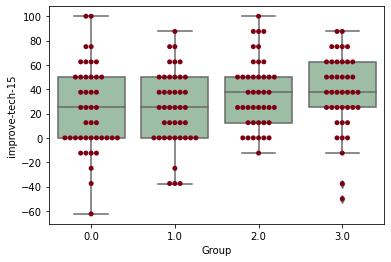

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='Group', y='improve-tech-15', data=overall_loc_scores_final, color='#99c2a2')
ax = sns.swarmplot(x="Group", y="improve-tech-15", data=overall_loc_scores_final, color='#7d0013')
plt.show()

>> Note: We want to have the linechart for each subgroups,   
   x-axis is the phases, 
   y-axis is the raw tech score, 
   legend we will have the groups   
   Interpretation: The 2 transparency conditions
   (2) and (3) seems to be improving more on tech. The median is higher. 

In [8]:
overall_loc_scores_final.groupby('Group', as_index=False)['tech-phase1'].mean()

,Group,tech-phase1
0,0.0,26.162791
1,1.0,40.476190
2,2.0,33.333333
3,3.0,36.585366


In [9]:
overall_loc_scores_final.groupby('Group', as_index=False)['tech-phase2'].mean()

,Group,tech-phase2
0,0.0,41.860465
1,1.0,58.333333
2,2.0,56.845238
3,3.0,60.365854


In [10]:
overall_loc_scores_final.groupby('Group', as_index=False)['tech-phase3'].mean()

,Group,tech-phase3
0,0.0,39.534884
1,1.0,57.440476
2,2.0,55.285714
3,3.0,60.060976


In [11]:
overall_loc_scores_final.groupby('Group', as_index=False)['tech-phase4'].mean()

,Group,tech-phase4
0,0.0,43.313953
1,1.0,61.607143
2,2.0,56.250000
3,3.0,64.634146


In [12]:
overall_loc_scores_final.groupby('Group', as_index=False)['tech-phase5'].mean()

,Group,tech-phase5
0,0.0,49.709302
1,1.0,64.880952
2,2.0,69.940476
3,3.0,73.780488


In [96]:
tech_phase5_bogota0 = overall_loc_scores_final[overall_loc_scores_final['Group'] == 0]['tech-phase5'].mean()

49.7093023255814

In [110]:
phase5_tech = []
phase4_tech = []
phase3_tech = []
phase2_tech = []
phase1_tech = []

for i in range(4):
    phase5_tech.append(overall_loc_scores[overall_loc_scores['Group'] == i]['tech-phase5'].mean())
    phase5_tech_median.append(overall_loc_scores[overall_loc_scores['Group'] == i]['tech-phase5'].median())

for i in range(4):
    phase4_tech.append(overall_loc_scores[overall_loc_scores['Group'] == i]['tech-phase4'].mean())
    phase4_tech_median.append(overall_loc_scores[overall_loc_scores['Group'] == i]['tech-phase4'].median())

for i in range(4):
    phase3_tech.append(overall_loc_scores[overall_loc_scores['Group'] == i]['tech-phase3'].mean())
    phase3_tech_median.append(overall_loc_scores[overall_loc_scores['Group'] == i]['tech-phase3'].median())

for i in range(4):
    phase2_tech.append(overall_loc_scores[overall_loc_scores['Group'] == i]['tech-phase2'].mean())
    phase2_tech_median.append(overall_loc_scores[overall_loc_scores['Group'] == i]['tech-phase2'].median())
    
for i in range(4):
    phase1_tech.append(overall_loc_scores[overall_loc_scores['Group'] == i]['tech-phase1'].mean())

## improve-tech-15 line charts


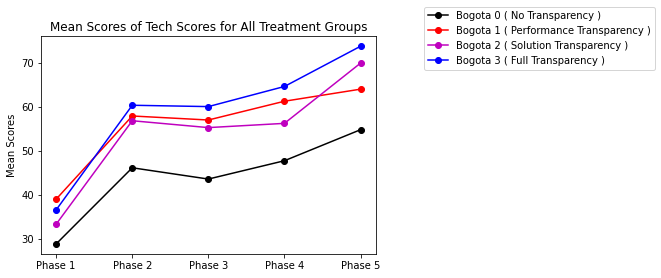

In [111]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [ Tech Scores ]

y1 = [phase1_tech[0], phase2_tech[0], phase3_tech[0], phase4_tech[0], phase5_tech[0] ]
y2 = [phase1_tech[1], phase2_tech[1], phase3_tech[1], phase4_tech[1], phase5_tech[1] ]
y3 = [phase1_tech[2], phase2_tech[2], phase3_tech[2], phase4_tech[2], phase5_tech[2] ]
y4 = [phase1_tech[3], phase2_tech[3], phase3_tech[3], phase4_tech[3], phase5_tech[3] ]

x_axis=['Phase 1', 'Phase 2', 'Phase 3', 'Phase 4', 'Phase 5']

line1 = plt.plot(x_axis, y1,'ko-',label='Bogota 0 ( No Transparency )')
line2 = plt.plot(x_axis, y2,'ro-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x_axis, y3,'mo-',label='Bogota 2 ( Solution Transparency )')
line3 = plt.plot(x_axis, y4,'bo-',label='Bogota 3 ( Full Transparency )')

plt.title("Mean Scores of Tech Scores for All Treatment Groups")
plt.ylabel("Mean Scores")

plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)

In [14]:
overall_loc_scores_tech = overall_loc_scores_final[["tech-phase1", "tech-phase2", "tech-phase3", "tech-phase4", "tech-phase5"]]

# lines = overall_loc_scores_tech.plot.line()

overall_loc_scores_tech

,tech-phase1,tech-phase2,tech-phase3,tech-phase4,tech-phase5
0,50.0,75.0,75.0,100.0,100.0
1,87.5,87.5,100.0,87.5,87.5
2,50.0,62.5,62.5,62.5,75.0
3,0.0,12.5,0.0,37.5,62.5
4,0.0,62.5,37.5,37.5,50.0
...,...,...,...,...,...
163,0.0,12.5,0.0,0.0,0.0
164,0.0,0.0,0.0,0.0,0.0
165,0.0,0.0,0.0,0.0,0.0
166,0.0,0.0,0.0,0.0,0.0


## improve-vis-15 Box Plot

/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 7.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


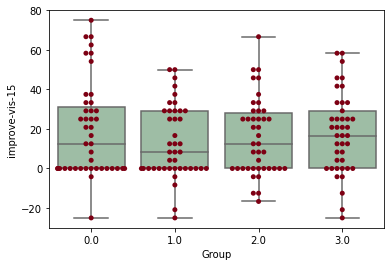

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='Group', y='improve-vis-15', data=overall_loc_scores_final, color='#99c2a2')
ax = sns.swarmplot(x="Group", y="improve-vis-15", data=overall_loc_scores_final, color='#7d0013')
plt.show()

>> Note: We want to have the linechart for each subgroups,   
   x-axis is the phases, 
   y-axis is the raw tech score, 
   legend we will have the groups   
   Interpretation: The baseline condition (1) seems to be highest in terms of improving on vis. Could be a skills.      effect. Check correlation with effort, LOC. 
   

In [16]:
overall_loc_scores_final.groupby('Group', as_index=False)['infovis-phase1'].mean()

,Group,infovis-phase1
0,0.0,13.275116
1,1.0,32.043571
2,2.0,26.389524
3,3.0,29.269024


In [17]:
overall_loc_scores_final.groupby('Group', as_index=False)['infovis-phase2'].mean()

,Group,infovis-phase2
0,0.0,23.642791
1,1.0,34.721667
2,2.0,29.761905
3,3.0,33.129512


In [18]:
overall_loc_scores_final.groupby('Group', as_index=False)['infovis-phase3'].mean()

,Group,infovis-phase3
0,0.0,28.197674
1,1.0,38.392143
2,2.0,35.415952
3,3.0,36.584634


In [19]:
overall_loc_scores_final.groupby('Group', as_index=False)['infovis-phase4'].mean()

,Group,infovis-phase4
0,0.0,29.554186
1,1.0,43.055476
2,2.0,36.606905
3,3.0,35.670000


In [20]:
overall_loc_scores_final.groupby('Group', as_index=False)['infovis-phase5'].mean()

,Group,infovis-phase5
0,0.0,32.752093
1,1.0,44.940476
2,2.0,42.162381
3,3.0,47.051951


## improve-vis-15 line charts

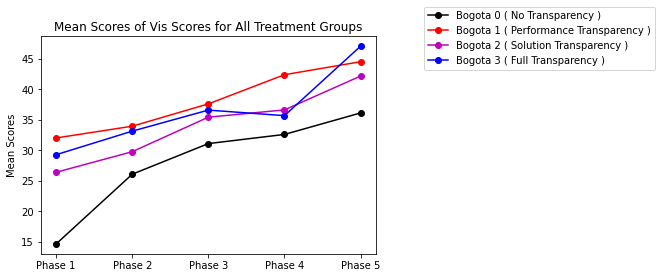

In [21]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [Vis Scores ]

y1 = [14.64, 26.07, 31.09, 32.59, 36.11]
y2 = [32.01, 33.94, 37.60, 42.38, 44.51]
y3 = [26.39, 29.76, 35.42, 36.61, 42.16]
y4 = [29.27, 33.13, 36.58, 35.67, 47.05]   

x_axis=['Phase 1', 'Phase 2', 'Phase 3', 'Phase 4', 'Phase 5']

line1 = plt.plot(x_axis, y1,'ko-',label='Bogota 0 ( No Transparency )')
line2 = plt.plot(x_axis, y2,'ro-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x_axis, y3,'mo-',label='Bogota 2 ( Solution Transparency )')
line3 = plt.plot(x_axis, y4,'bo-',label='Bogota 3 ( Full Transparency )')

plt.title("Mean Scores of Vis Scores for All Treatment Groups")
plt.ylabel("Mean Scores")

plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)

## improve-ur-15 Box Plot

/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 16.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 21.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


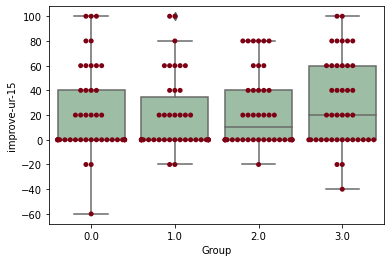

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='Group', y='improve-ur-15', data=overall_loc_scores_final, color='#99c2a2')
ax = sns.swarmplot(x="Group", y="improve-ur-15", data=overall_loc_scores_final, color='#7d0013')
plt.show()

In [23]:
overall_loc_scores_final.groupby('Group', as_index=False)['user-requirement-phase1'].mean()

,Group,user-requirement-phase1
0,0.0,7.906977
1,1.0,20.952381
2,2.0,14.285714
3,3.0,17.073171


In [24]:
overall_loc_scores_final.groupby('Group', as_index=False)['user-requirement-phase2'].mean()

,Group,user-requirement-phase2
0,0.0,12.093023
1,1.0,25.238095
2,2.0,21.428571
3,3.0,27.804878


In [25]:
overall_loc_scores_final.groupby('Group', as_index=False)['user-requirement-phase3'].mean()

,Group,user-requirement-phase3
0,0.0,22.325581
1,1.0,33.809524
2,2.0,29.523810
3,3.0,29.268293


In [26]:
overall_loc_scores_final.groupby('Group', as_index=False)['user-requirement-phase4'].mean()

,Group,user-requirement-phase4
0,0.0,20.930233
1,1.0,37.619048
2,2.0,33.333333
3,3.0,33.170732


In [27]:
overall_loc_scores_final.groupby('Group', as_index=False)['user-requirement-phase5'].mean()

,Group,user-requirement-phase5
0,0.0,29.767442
1,1.0,40.000000
2,2.0,37.619048
3,3.0,46.341463


## improve-ur-15 Line Charts

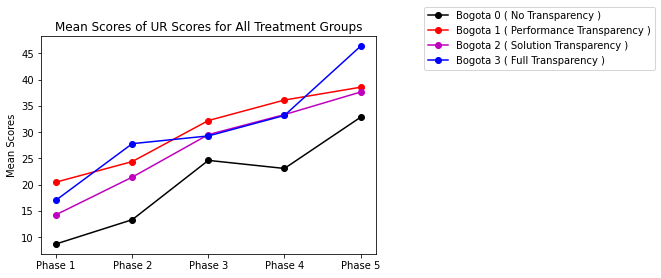

In [28]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [ UR Scores ]

y1 = [8.72, 13.33, 24.62, 23.08, 32.82]
y2 = [20.49, 24.39, 32.2, 36.1, 38.54]
y3 = [14.29, 21.43, 29.52, 33.33, 37.62]
y4 = [17.07, 27.8, 29.27, 33.17, 46.34]   

x_axis=['Phase 1', 'Phase 2', 'Phase 3', 'Phase 4', 'Phase 5']

line1 = plt.plot(x_axis, y1,'ko-',label='Bogota 0 ( No Transparency )')
line2 = plt.plot(x_axis, y2,'ro-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x_axis, y3,'mo-',label='Bogota 2 ( Solution Transparency )')
line3 = plt.plot(x_axis, y4,'bo-',label='Bogota 3 ( Full Transparency )')

plt.title("Mean Scores of UR Scores for All Treatment Groups")
plt.ylabel("Mean Scores")

plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)

## improve-novel-15 Box Plots

/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 7.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


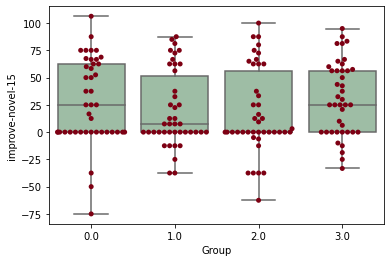

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='Group', y='improve-novel-15', data=overall_loc_scores_final, color='#99c2a2')
ax = sns.swarmplot(x="Group", y="improve-novel-15", data=overall_loc_scores_final, color='#7d0013')
plt.show()

In [30]:
overall_loc_scores_final.groupby('Group', as_index=False)['novelty-phase1'].mean()

,Group,novelty-phase1
0,0.0,8.139535
1,1.0,27.956429
2,2.0,24.702381
3,3.0,19.867805


In [31]:
overall_loc_scores_final.groupby('Group', as_index=False)['novelty-phase2'].mean()

,Group,novelty-phase2
0,0.0,20.058140
1,1.0,35.565476
2,2.0,32.142857
3,3.0,23.018293


In [32]:
overall_loc_scores_final.groupby('Group', as_index=False)['novelty-phase3'].mean()

,Group,novelty-phase3
0,0.0,24.563953
1,1.0,42.113095
2,2.0,30.257857
3,3.0,25.304878


In [33]:
overall_loc_scores_final.groupby('Group', as_index=False)['novelty-phase4'].mean()

,Group,novelty-phase4
0,0.0,26.744186
1,1.0,39.727143
2,2.0,29.042619
3,3.0,30.589512


In [34]:
overall_loc_scores_final.groupby('Group', as_index=False)['novelty-phase5'].mean()

,Group,novelty-phase5
0,0.0,35.484651
1,1.0,47.817619
2,2.0,42.797857
3,3.0,50.690976


## improve-novel-15 Line Charts

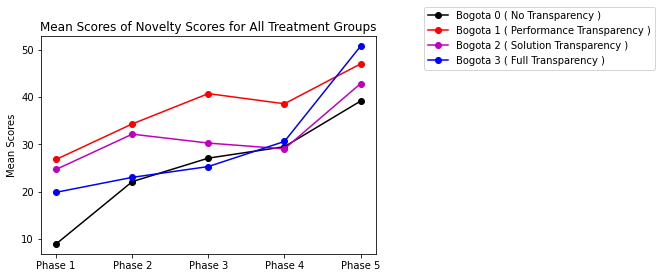

In [35]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [ Novelty Scores ]

y1 = [8.97, 22.12, 27.08, 29.49, 39.12]
y2 = [26.81, 34.3, 40.7, 38.56, 46.97]
y3 = [24.7, 32.14, 30.26, 29.04, 42.8]
y4 = [19.87, 23.02, 25.3, 30.6, 50.7]   

x_axis=['Phase 1', 'Phase 2', 'Phase 3', 'Phase 4', 'Phase 5']

line1 = plt.plot(x_axis, y1,'ko-',label='Bogota 0 ( No Transparency )')
line2 = plt.plot(x_axis, y2,'ro-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x_axis, y3,'mo-',label='Bogota 2 ( Solution Transparency )')
line3 = plt.plot(x_axis, y4,'bo-',label='Bogota 3 ( Full Transparency )')

plt.title("Mean Scores of Novelty Scores for All Treatment Groups")
plt.ylabel("Mean Scores")

plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)

## add-loc-15 Box Plots

/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 32.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 21.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


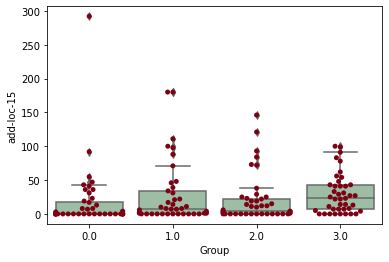

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='Group', y='add-loc-15', data=overall_loc_scores_final, color='#99c2a2')
ax = sns.swarmplot(x="Group", y="add-loc-15", data=overall_loc_scores_final, color='#7d0013')
plt.show()

In [37]:
overall_loc_scores_final.groupby('Group', as_index=False)['add-loc-15'].mean()

,Group,add-loc-15
0,0.0,18.093023
1,1.0,27.857143
2,2.0,21.166667
3,3.0,29.487805


In [38]:
overall_loc_scores_final.groupby('Group', as_index=False)['add-loc-12'].mean()

,Group,add-loc-12
0,0.0,13.976744
1,1.0,11.952381
2,2.0,12.023810
3,3.0,25.609756


In [39]:
overall_loc_scores_final.groupby('Group', as_index=False)['add-loc-23'].mean()

,Group,add-loc-23
0,0.0,17.325581
1,1.0,26.500000
2,2.0,12.119048
3,3.0,19.707317


In [40]:
overall_loc_scores_final.groupby('Group', as_index=False)['add-loc-34'].mean()

,Group,add-loc-34
0,0.0,17.325581
1,1.0,24.142857
2,2.0,19.976190
3,3.0,29.731707


In [41]:
overall_loc_scores_final.groupby('Group', as_index=False)['add-loc-45'].mean()

,Group,add-loc-45
0,0.0,17.534884
1,1.0,11.952381
2,2.0,9.523810
3,3.0,37.219512


## add-loc-15 line charts

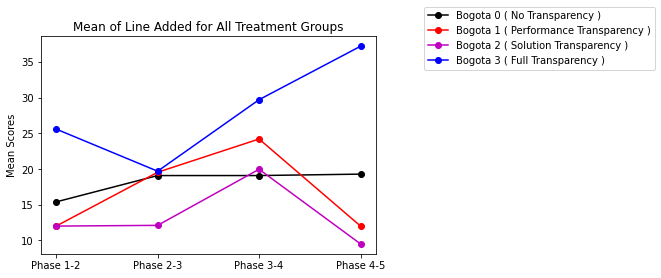

In [42]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [ Novelty Scores ]

y1 = [15.41, 19.1, 19.1, 19.3]
y2 = [12.02, 19.56, 24.22, 12.02]
y3 = [12.02, 12.12, 19.98, 9.52]
y4 = [25.61, 19.71, 29.73, 37.22]   

x_axis=['Phase 1-2', 'Phase 2-3', 'Phase 3-4', 'Phase 4-5']

line1 = plt.plot(x_axis, y1,'ko-',label='Bogota 0 ( No Transparency )')
line2 = plt.plot(x_axis, y2,'ro-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x_axis, y3,'mo-',label='Bogota 2 ( Solution Transparency )')
line3 = plt.plot(x_axis, y4,'bo-',label='Bogota 3 ( Full Transparency )')

plt.title("Mean of Line Added for All Treatment Groups")
plt.ylabel("Mean Scores")

plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)

## delete-loc-15 Box Plot

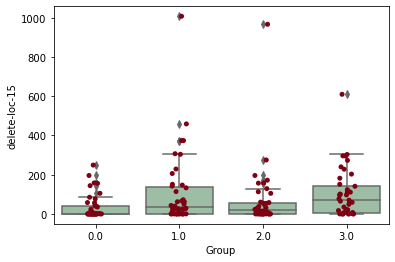

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='Group', y='delete-loc-15', data=overall_loc_scores_final, color='#99c2a2')
ax = sns.stripplot(x="Group", y="delete-loc-15", data=overall_loc_scores_final, color='#7d0013')
plt.show()

In [44]:
overall_loc_scores_final.groupby('Group', as_index=False)['delete-loc-15'].mean()

,Group,delete-loc-15
0,0.0,33.883721
1,1.0,108.547619
2,2.0,67.309524
3,3.0,104.365854


In [45]:
overall_loc_scores_final.groupby('Group', as_index=False)['delete-loc-12'].mean()

,Group,delete-loc-12
0,0.0,25.651163
1,1.0,23.166667
2,2.0,32.857143
3,3.0,51.975610


In [46]:
overall_loc_scores_final.groupby('Group', as_index=False)['delete-loc-23'].mean()

,Group,delete-loc-23
0,0.0,13.232558
1,1.0,40.404762
2,2.0,32.166667
3,3.0,31.341463


In [47]:
overall_loc_scores_final.groupby('Group', as_index=False)['delete-loc-34'].mean()

,Group,delete-loc-34
0,0.0,50.883721
1,1.0,58.023810
2,2.0,28.928571
3,3.0,81.682927


In [48]:
overall_loc_scores_final.groupby('Group', as_index=False)['delete-loc-45'].mean()

,Group,delete-loc-45
0,0.0,26.651163
1,1.0,23.166667
2,2.0,22.833333
3,3.0,34.463415


## delete-loc-15 Line Charts

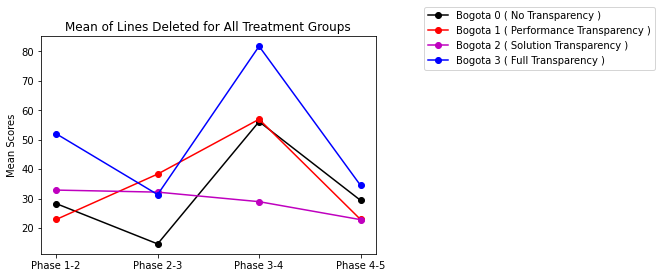

In [49]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [ Novelty Scores ]

y1 = [28.28, 14.59, 56.10, 29.38]
y2 = [22.88, 38.29, 56.90, 22.88]
y3 = [32.86, 32.17, 28.93, 22.83]
y4 = [51.98, 31.34, 81.68, 34.46]   

x_axis=['Phase 1-2', 'Phase 2-3', 'Phase 3-4', 'Phase 4-5']

line1 = plt.plot(x_axis, y1,'ko-',label='Bogota 0 ( No Transparency )')
line2 = plt.plot(x_axis, y2,'ro-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x_axis, y3,'mo-',label='Bogota 2 ( Solution Transparency )')
line3 = plt.plot(x_axis, y4,'bo-',label='Bogota 3 ( Full Transparency )')

plt.title("Mean of Lines Deleted for All Treatment Groups")
plt.ylabel("Mean Scores")

plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)

## improve-effort-15 Box Plots

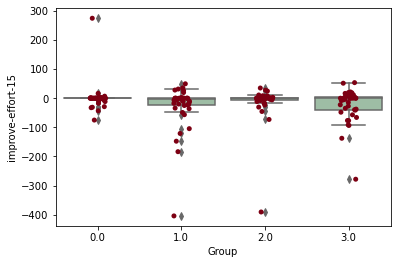

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='Group', y='improve-effort-15', data=overall_loc_scores_final, color='#99c2a2')
ax = sns.stripplot(x="Group", y='improve-effort-15', data=overall_loc_scores_final, color='#7d0013')
plt.show()

In [51]:
overall_loc_scores_final.groupby('Group', as_index=False)['improve-effort-15'].mean()

,Group,improve-effort-15
0,0.0,1.151163
1,1.0,-26.416667
2,2.0,-12.488095
3,3.0,-22.695122


In [52]:
overall_loc_scores_final.groupby('Group', as_index=False)['improve-effort-12'].mean()

,Group,improve-effort-12
0,0.0,1.151163
1,1.0,0.369048
2,2.0,-4.404762
3,3.0,-0.378049


In [53]:
overall_loc_scores_final.groupby('Group', as_index=False)['improve-effort-23'].mean()

,Group,improve-effort-23
0,0.0,10.709302
1,1.0,6.297619
2,2.0,-3.964286
3,3.0,4.036585


In [54]:
overall_loc_scores_final.groupby('Group', as_index=False)['improve-effort-34'].mean()

,Group,improve-effort-34
0,0.0,-8.116279
1,1.0,-4.869048
2,2.0,5.511905
3,3.0,-11.109756


In [55]:
overall_loc_scores_final.groupby('Group', as_index=False)['improve-effort-45'].mean()

,Group,improve-effort-45
0,0.0,4.209302
1,1.0,0.369048
2,2.0,-1.892857
3,3.0,19.987805


## improve-effort-15 Line Charts

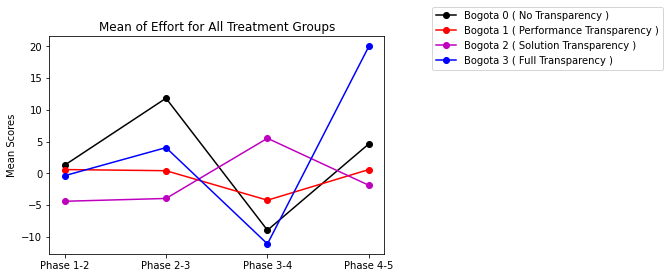

In [56]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [ Novelty Scores ]

y1 = [1.27, 11.81, -8.95, 4.64]
y2 = [0.59, 0.41, -4.23, 0.59]
y3 = [-4.40, -3.96, 5.51, -1.89]
y4 = [-0.38, 4.04, -11.11, 19.99]   

x_axis=['Phase 1-2', 'Phase 2-3', 'Phase 3-4', 'Phase 4-5']

line1 = plt.plot(x_axis, y1,'ko-',label='Bogota 0 ( No Transparency )')
line2 = plt.plot(x_axis, y2,'ro-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x_axis, y3,'mo-',label='Bogota 2 ( Solution Transparency )')
line3 = plt.plot(x_axis, y4,'bo-',label='Bogota 3 ( Full Transparency )')

plt.title("Mean of Effort for All Treatment Groups")
plt.ylabel("Mean Scores")

plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)

## change-files-15 Box Plots

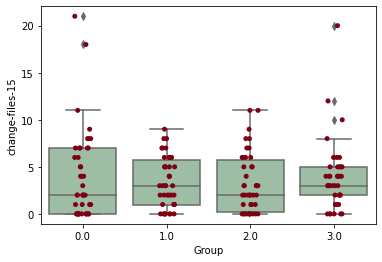

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='Group', y='change-files-15', data=overall_loc_scores_final, color='#99c2a2')
ax = sns.stripplot(x="Group", y='change-files-15', data=overall_loc_scores_final, color='#7d0013')
plt.show()

In [58]:
overall_loc_scores_final.groupby('Group', as_index=False)['change-files-15'].mean()

,Group,change-files-15
0,0.0,3.976744
1,1.0,3.428571
2,2.0,3.261905
3,3.0,3.804878


In [59]:
overall_loc_scores_final.groupby('Group', as_index=False)['change-files-12'].mean()

,Group,change-files-12
0,0.0,1.930233
1,1.0,1.547619
2,2.0,2.309524
3,3.0,2.512195


In [60]:
overall_loc_scores_final.groupby('Group', as_index=False)['change-files-23'].mean()

,Group,change-files-23
0,0.0,1.232558
1,1.0,1.119048
2,2.0,1.285714
3,3.0,1.731707


In [61]:
overall_loc_scores_final.groupby('Group', as_index=False)['change-files-34'].mean()

,Group,change-files-34
0,0.0,1.790698
1,1.0,1.880952
2,2.0,1.547619
3,3.0,1.658537


In [62]:
overall_loc_scores_final.groupby('Group', as_index=False)['change-files-45'].mean()

,Group,change-files-45
0,0.0,1.023256
1,1.0,1.547619
2,2.0,1.214286
3,3.0,1.463415


## change-files-15 Line Charts

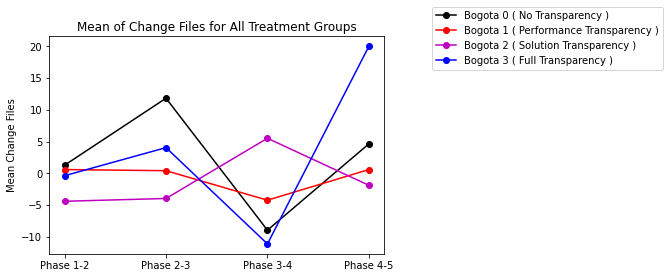

In [63]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [ Novelty Scores ]

y1 = [1.27, 11.81, -8.95, 4.64]
y2 = [0.59, 0.41, -4.23, 0.59]
y3 = [-4.40, -3.96, 5.51, -1.89]
y4 = [-0.38, 4.04, -11.11, 19.99]   

x_axis=['Phase 1-2', 'Phase 2-3', 'Phase 3-4', 'Phase 4-5']

line1 = plt.plot(x_axis, y1,'ko-',label='Bogota 0 ( No Transparency )')
line2 = plt.plot(x_axis, y2,'ro-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x_axis, y3,'mo-',label='Bogota 2 ( Solution Transparency )')
line3 = plt.plot(x_axis, y4,'bo-',label='Bogota 3 ( Full Transparency )')

plt.title("Mean of Change Files for All Treatment Groups")
plt.ylabel("Mean Change Files")

plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)

## EDA Survey Questions [ Programming Skills ] 


### Q7 - 1

- Strongly Disagree - 0
- Disagree - 1
- Somewhat Disagree - 2
- Neither Agree nor Disagree - 3
- Somewhat Agree - 4
- Agree - 5
- Strongly Agree - 6

>> I am extremely skilled at programming in Javascript

>> Interpretation - Majority of the participants in all groups don't think that they are extremely skilled at Javascript. 

<AxesSubplot:>

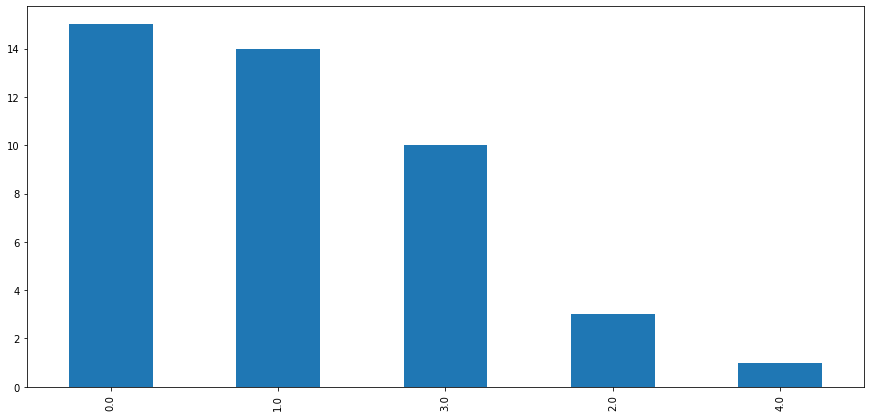

In [64]:
survey0['Q7_Q7_1'].value_counts().plot(kind='bar', figsize=(15, 7))

<AxesSubplot:>

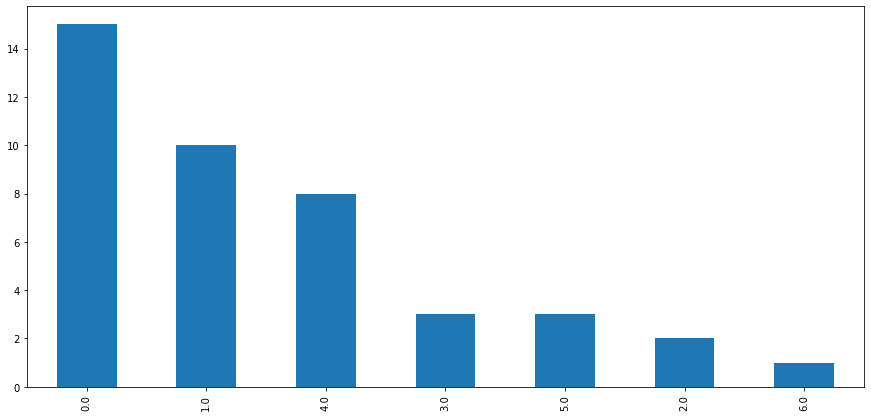

In [65]:
survey1['Q7_Q7_1'].value_counts().plot(kind='bar', figsize=(15, 7))

<AxesSubplot:>

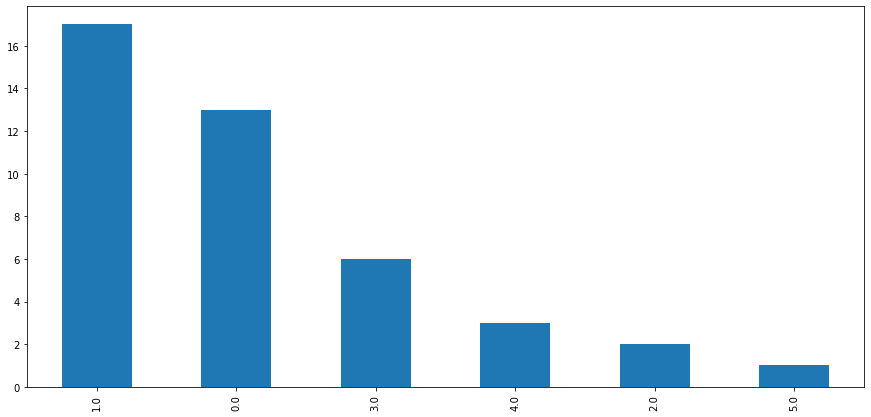

In [66]:
survey2['Q7_Q7_1'].value_counts().plot(kind='bar', figsize=(15, 7))

<AxesSubplot:>

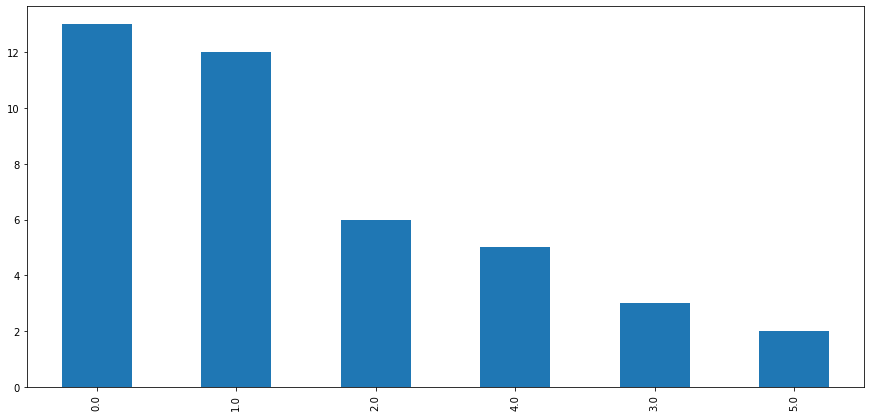

In [67]:
survey3['Q7_Q7_1'].value_counts().plot(kind='bar', figsize=(15, 7))

### Q7-2

>> I consider myself knowledgeable about good coding techniques on mashup design (combining data in an interactive web application)

>> Interpretation - Majority of the participants are undecided whether they know what a mashup is except for the full transparency group where majority of the participants have no idea what a mashup is. 

<AxesSubplot:>

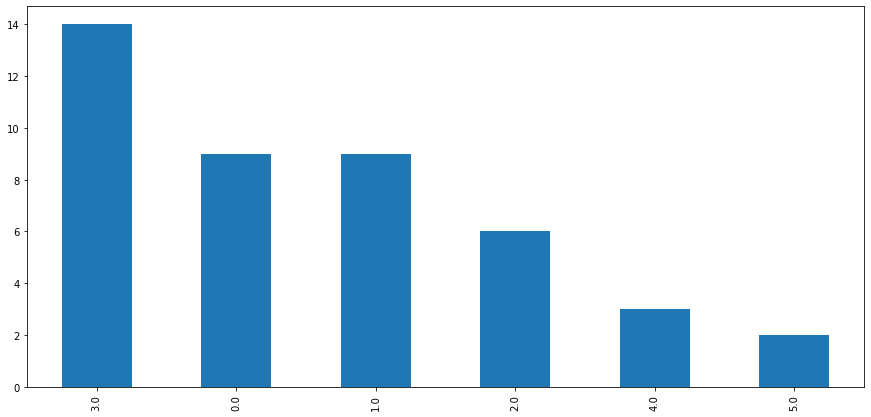

In [68]:
survey0['Q7_Q7_2'].value_counts().plot(kind='bar', figsize=(15, 7))

<AxesSubplot:>

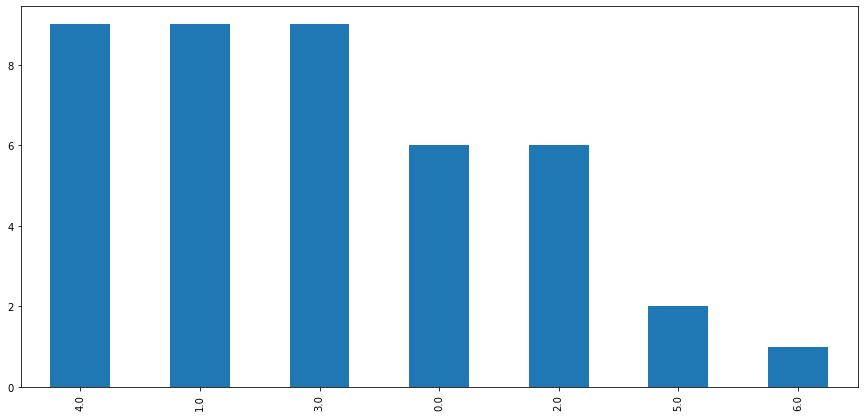

In [69]:
survey1['Q7_Q7_2'].value_counts().plot(kind='bar', figsize=(15, 7))


<AxesSubplot:>

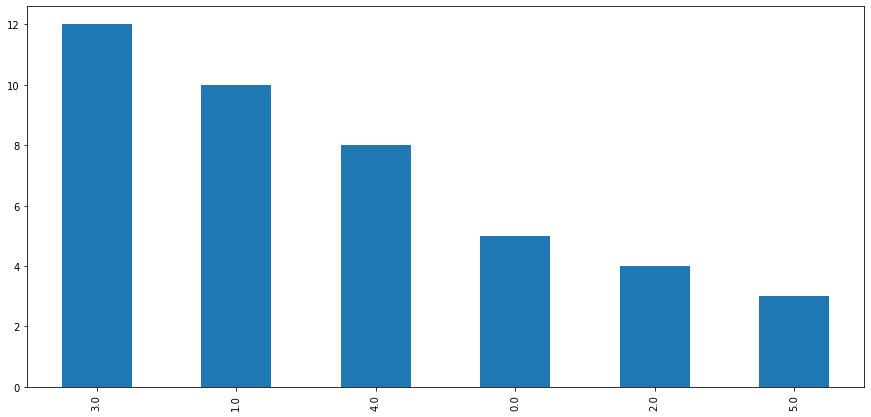

In [70]:
survey2['Q7_Q7_2'].value_counts().plot(kind='bar', figsize=(15, 7))

<AxesSubplot:>

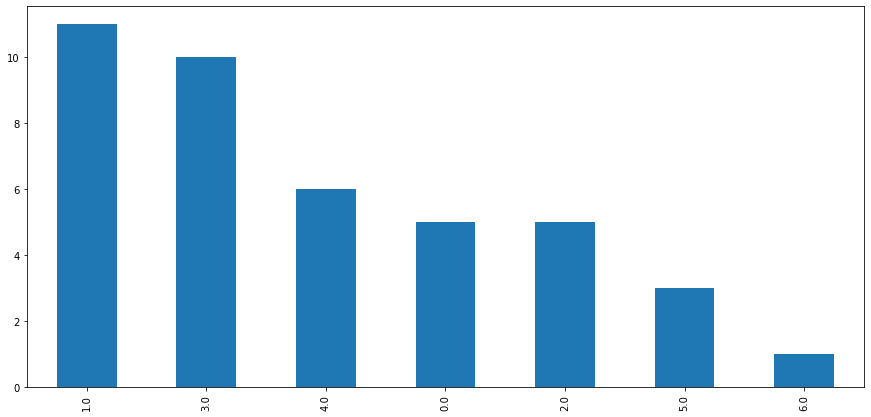

In [71]:
survey3['Q7_Q7_2'].value_counts().plot(kind='bar', figsize=(15, 7))

### Q7-3

>> I know somewhat more than most programmers about programming in Javascript

>> Interpretation - Majority of the participants in all groups. don't think that they know a lot about Javascript. 

<AxesSubplot:>

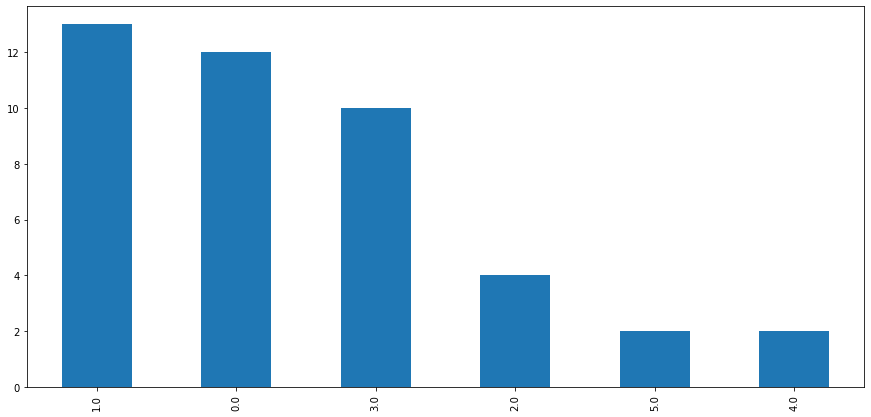

In [72]:
survey0['Q7_Q7_3'].value_counts().plot(kind='bar', figsize=(15, 7))

<AxesSubplot:>

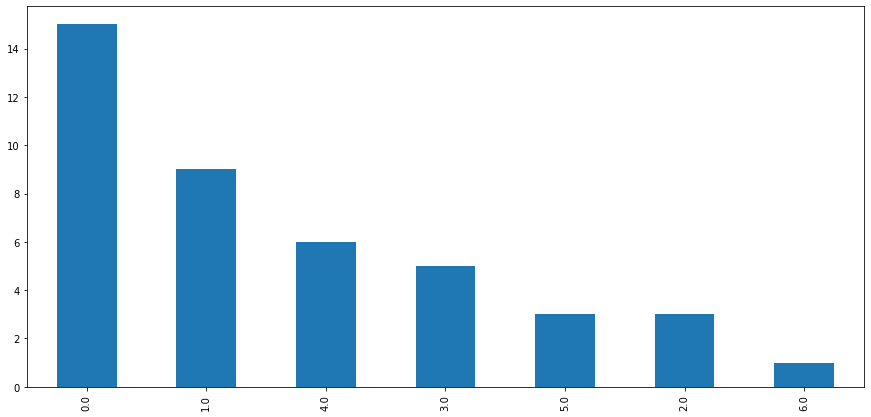

In [73]:
survey1['Q7_Q7_3'].value_counts().plot(kind='bar', figsize=(15, 7))

<AxesSubplot:>

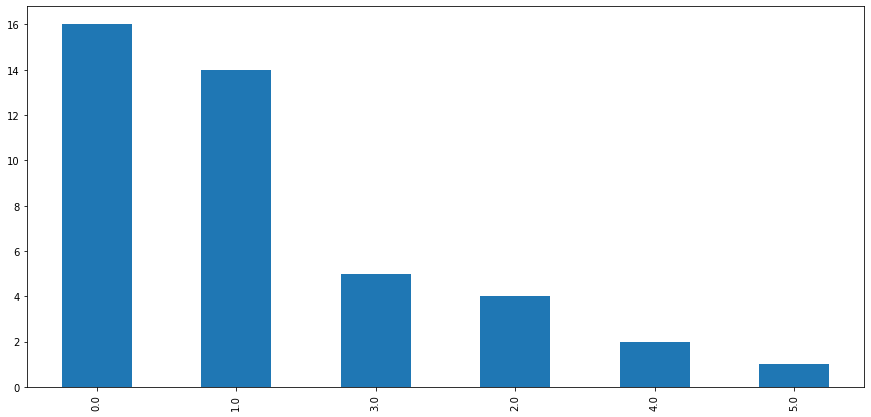

In [74]:
survey2['Q7_Q7_3'].value_counts().plot(kind='bar', figsize=(15, 7))

<AxesSubplot:>

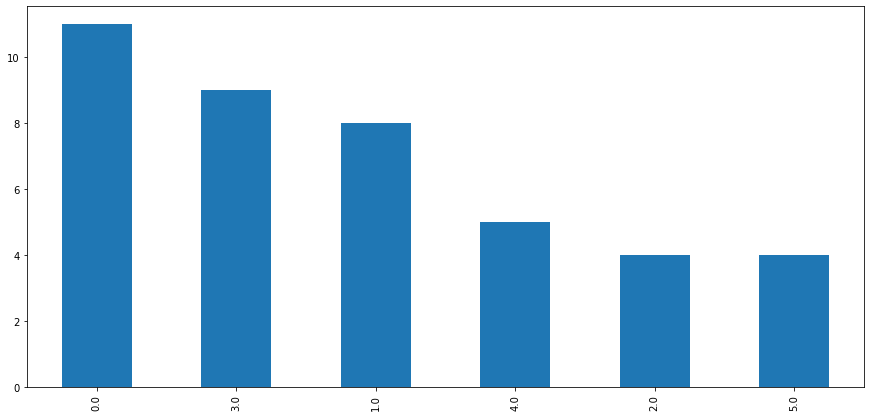

In [75]:
survey3['Q7_Q7_3'].value_counts().plot(kind='bar', figsize=(15, 7))

### Q7 - 4

>> I know how to find what I am looking for when designing a mashup

>> Interpretation - Majority of the participants are undecided about designing mashup.  

<AxesSubplot:>

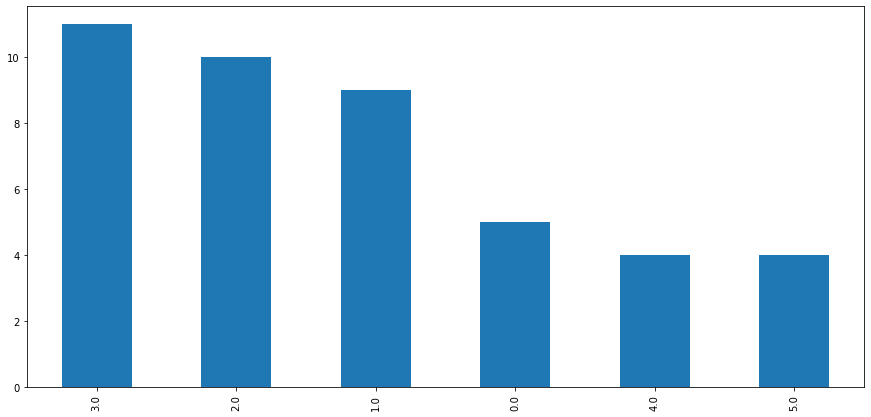

In [76]:
survey0['Q7_Q7_4'].value_counts().plot(kind='bar', figsize=(15, 7))

<AxesSubplot:>

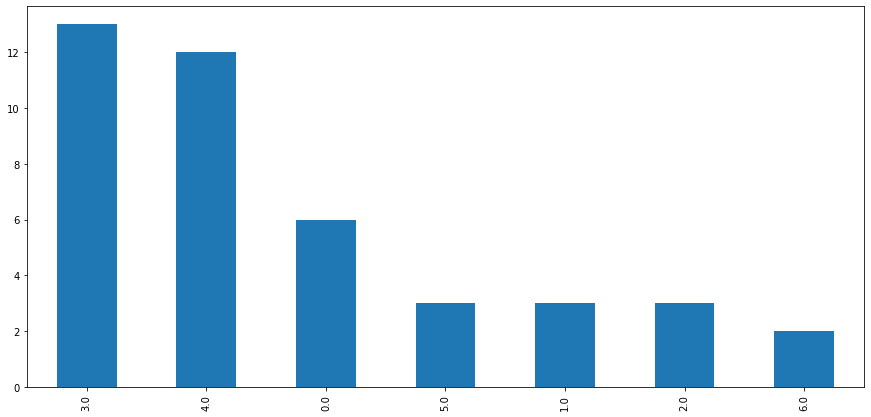

In [77]:
survey1['Q7_Q7_4'].value_counts().plot(kind='bar', figsize=(15, 7))

<AxesSubplot:>

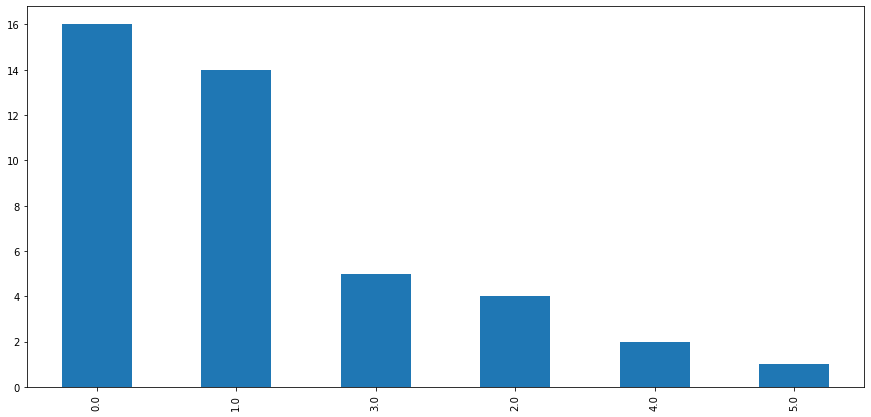

In [78]:
survey2['Q7_Q7_3'].value_counts().plot(kind='bar', figsize=(15, 7))

<AxesSubplot:>

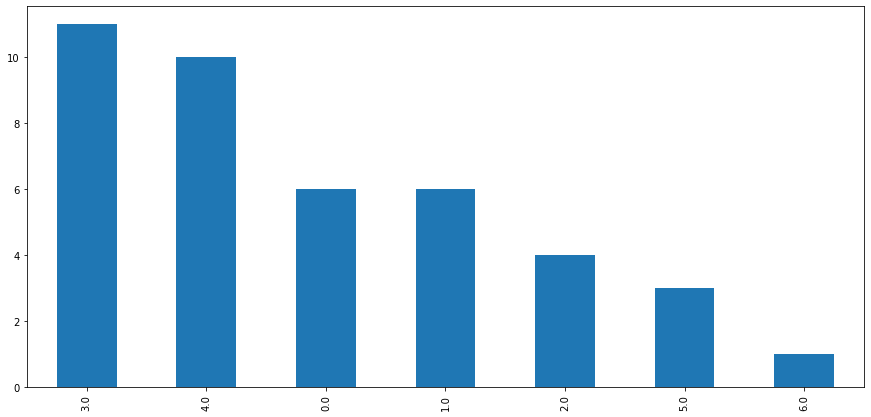

In [79]:
survey3['Q7_Q7_4'].value_counts().plot(kind='bar', figsize=(15, 7))

### Q8 - 1

- Very Bad - 0
- Bad - 1
- Poor - 2
- Neither Good nor Bad - 3
- Fair - 4
- Good - 5
- Very Good - 6

>> How would you rate your skill at programming, compared to other things you do on the computer?

<AxesSubplot:>

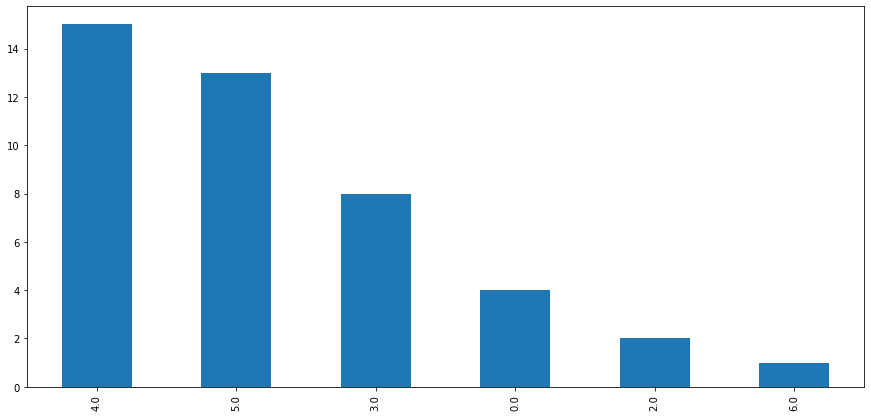

In [80]:
survey0['Q8_Q8_1'].value_counts().plot(kind='bar', figsize=(15, 7))

<AxesSubplot:>

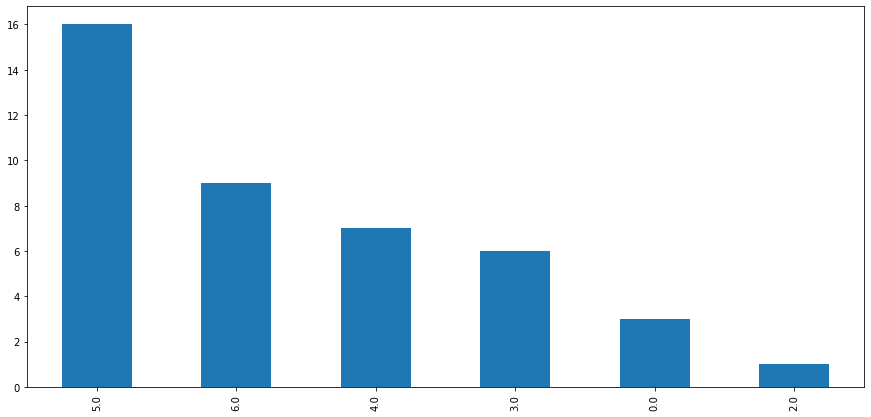

In [81]:
survey1['Q8_Q8_1'].value_counts().plot(kind='bar', figsize=(15, 7))

<AxesSubplot:>

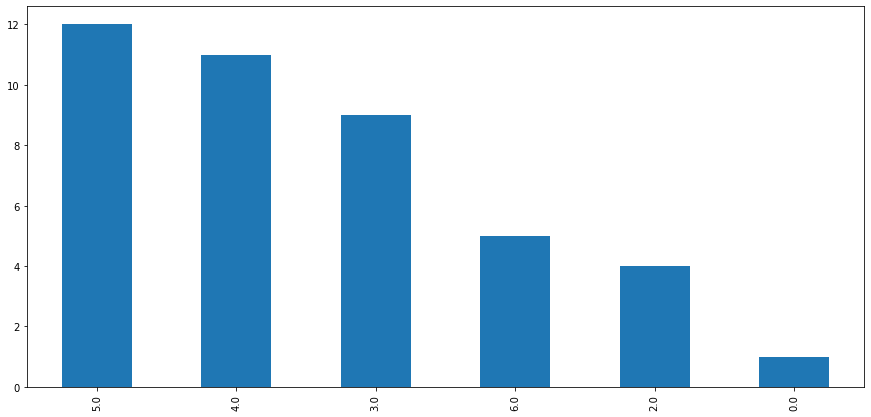

In [82]:
survey2['Q8_Q8_1'].value_counts().plot(kind='bar', figsize=(15, 7))

<AxesSubplot:>

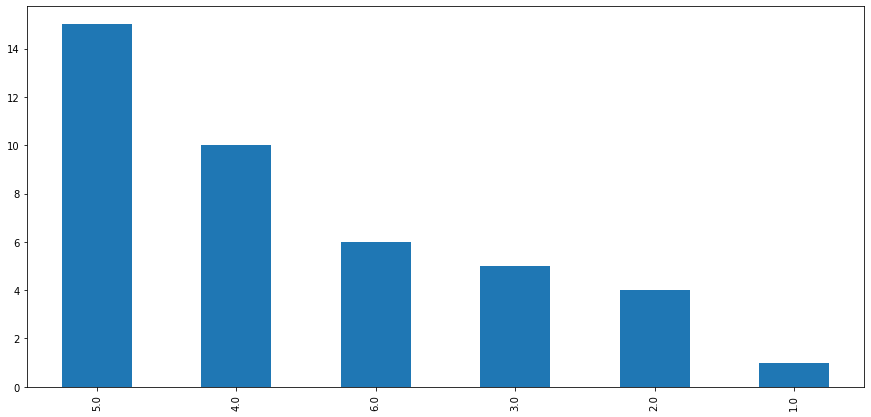

In [83]:
survey3['Q8_Q8_1'].value_counts().plot(kind='bar', figsize=(15, 7))

### Q8 - 2

>> How would you rate your skill at programming, compared to the sport or game you are best at?

<AxesSubplot:>

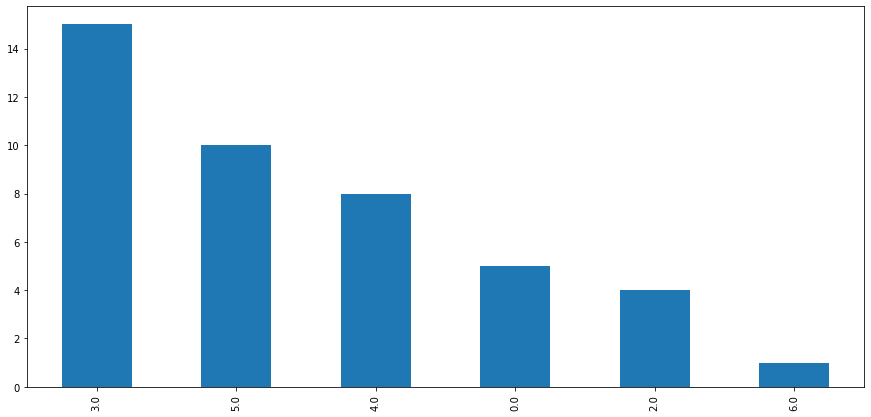

In [84]:
survey0['Q8_Q8_2'].value_counts().plot(kind='bar', figsize=(15, 7))

<AxesSubplot:>

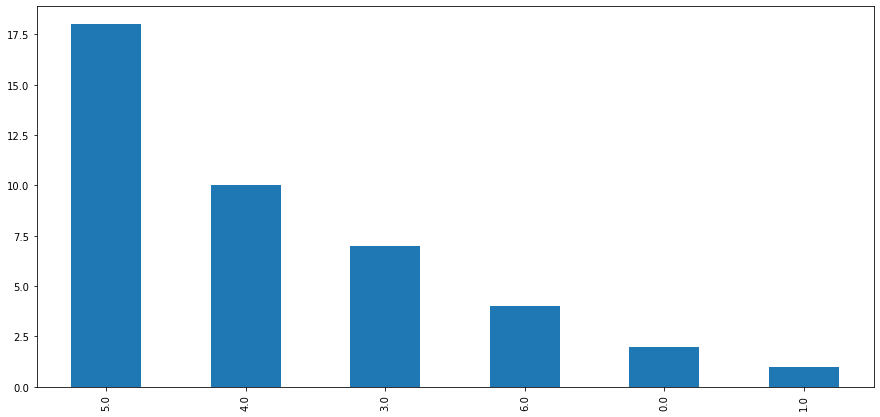

In [85]:
survey1['Q8_Q8_2'].value_counts().plot(kind='bar', figsize=(15, 7))

<AxesSubplot:>

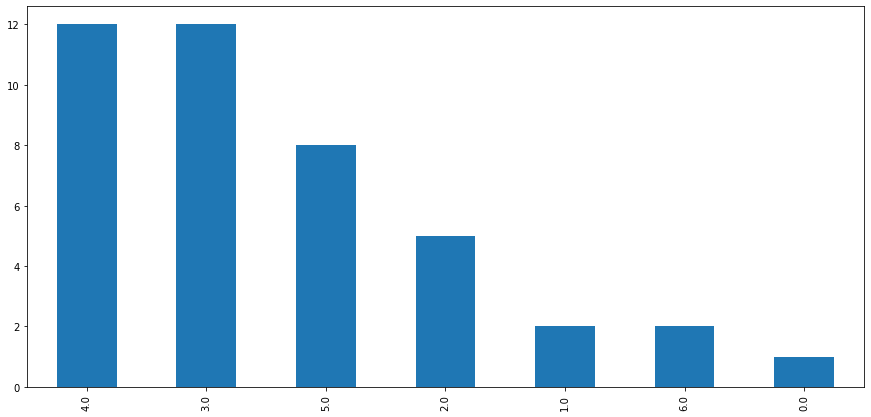

In [86]:
survey2['Q8_Q8_2'].value_counts().plot(kind='bar', figsize=(15, 7))

<AxesSubplot:>

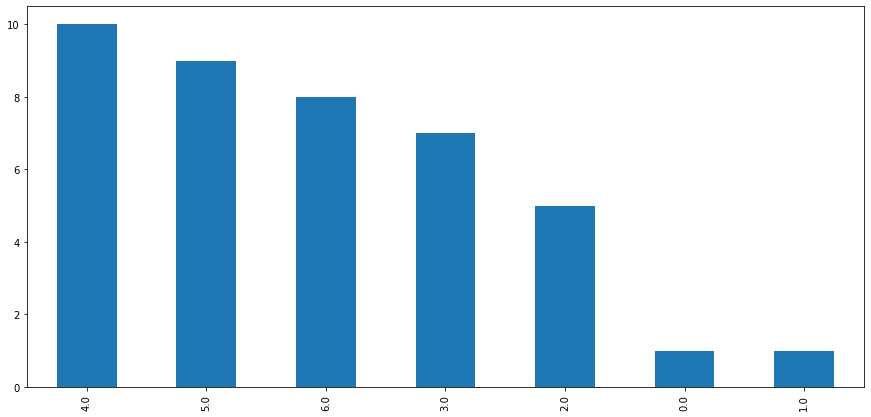

In [87]:
survey3['Q8_Q8_2'].value_counts().plot(kind='bar', figsize=(15, 7))

### Q10 

- Bottom of the contest - 0
- Below Average - 1
- Average - 2
- Top 10 - 3
- Top 3 - 4

>> Based on your past experience,  what place do you think you will receive in this IronHacks?

>> Inference - Majority of the participants in all groups think that they are going to perform average. 
 

<AxesSubplot:>

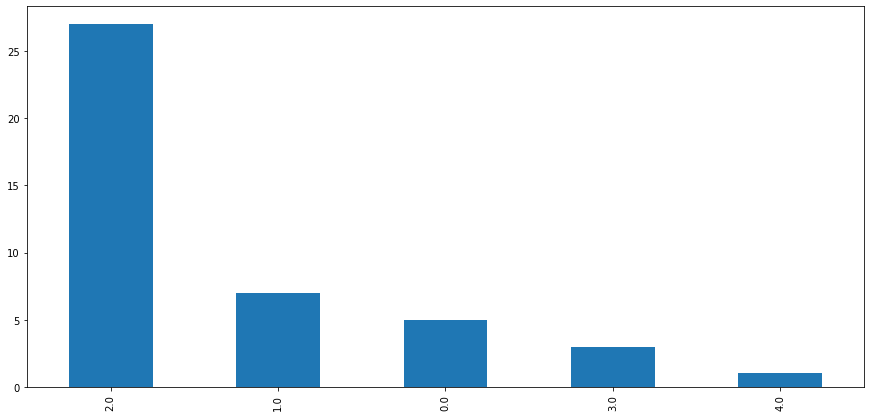

In [88]:
survey0['Q10'].value_counts().plot(kind='bar', figsize=(15, 7))

<AxesSubplot:>

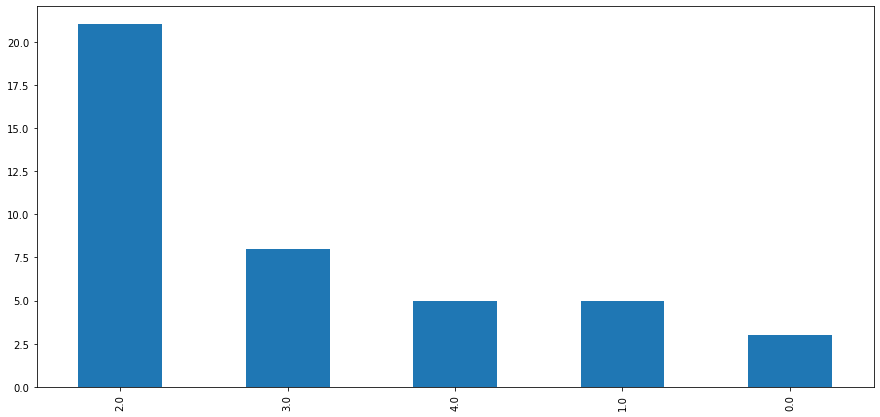

In [89]:
survey1['Q10'].value_counts().plot(kind='bar', figsize=(15, 7))

<AxesSubplot:>

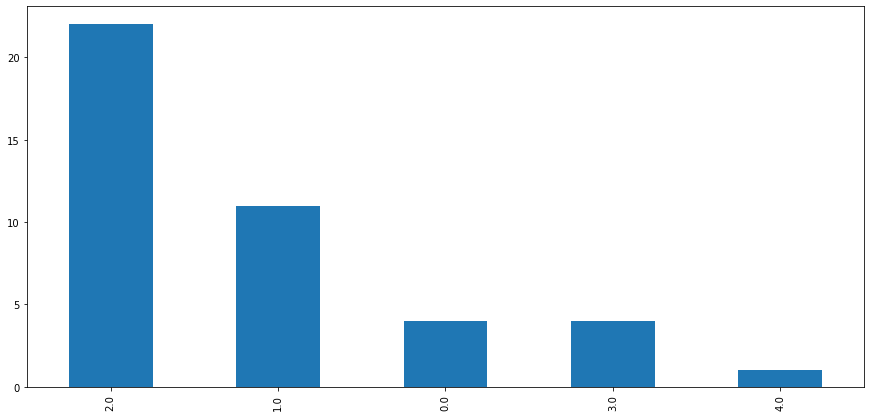

In [90]:
survey2['Q10'].value_counts().plot(kind='bar', figsize=(15, 7))

<AxesSubplot:>

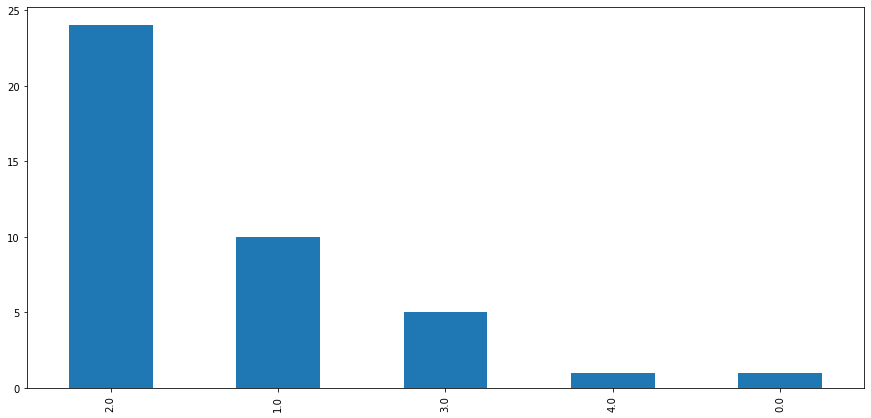

In [91]:
survey3['Q10'].value_counts().plot(kind='bar', figsize=(15, 7))